# WeatherPy

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
#Generate Cities list from citipy library

#empty lists for holding values and names
lat_lngs = []
cities = []

# Range of lat and lon
lat_range = (-90, 90)
lng_range = (-180, 180)

#generate a set of random lat and lon combos
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#find closest city for each lat,lon combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    #add only unique cities
    if city not in cities: 
        cities.append(city)

print(f'Number of cities in the list: {len(cities)}')

Number of cities in the list: 572


# Relationship between Weather Variables & Latitude

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

#hold weather data for each city
city_data = []

#Logging
print('Beginning Data Retrieval    ')
print('----------------------------')

#Establish Counters
record_count = 1
set_count = 1

#Loop through all cities in list to fetch weater data
for i, city in enumerate(cities):
    #group cities in sets of 50
    if (i % 50 == 0 and i>= 50):
        set_count += 1
        record_count = 0
    #endpoint url
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    #log URL
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #increase record count 
    record_count += 1

    #Run API Request of each city
    try: 
        city_weather = requests.get(city_url).json()
        
        # Collect latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print('City not found. Skipping...')
        pass
#Data loading complete indication
print('----------------------')
print('Data Retrieval Complete')
print('----------------------')

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | berezovyy
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | richards bay
Processing Record 7 of Set 1 | arauca
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | naze
Processing Record 10 of Set 1 | wuhai
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | cole harbour
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | borazjan
Processing Record 18 of Set 1 | aasiaat
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 | paita
Processing Rec

In [4]:
#create DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,17.97,68,0,5.66,US,1715194835
1,berezovyy,51.6667,135.7000,10.73,55,100,2.29,RU,1715194836
2,tiksi,71.6872,128.8694,-9.37,95,63,3.24,RU,1715194836
3,edinburgh of the seven seas,-37.0676,-12.3116,14.32,67,35,10.70,SH,1715194836
4,hamilton,39.1834,-84.5333,29.79,51,0,2.06,US,1715194369


In [6]:
#Export data to csv file
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
#Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,17.97,68,0,5.66,US,1715194835
1,berezovyy,51.6667,135.7000,10.73,55,100,2.29,RU,1715194836
2,tiksi,71.6872,128.8694,-9.37,95,63,3.24,RU,1715194836
3,edinburgh of the seven seas,-37.0676,-12.3116,14.32,67,35,10.70,SH,1715194836
4,hamilton,39.1834,-84.5333,29.79,51,0,2.06,US,1715194369


# Scatter Plots

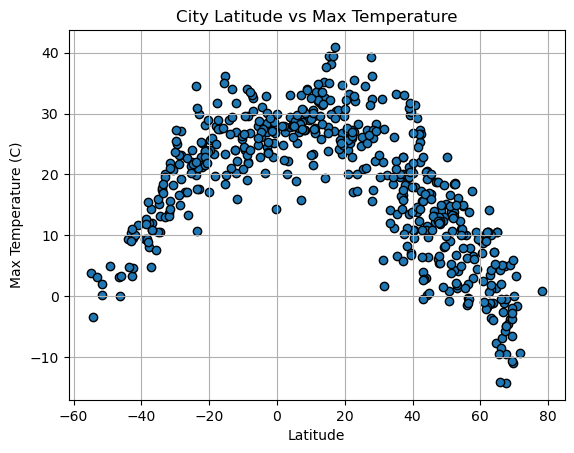

In [8]:
#Latitude vs Temperature
lat = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
plt.scatter(x=lat, y=max_temp, edgecolors='black')
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

#Save png file
plt.savefig('output_data/Fig1.png')


plt.show()



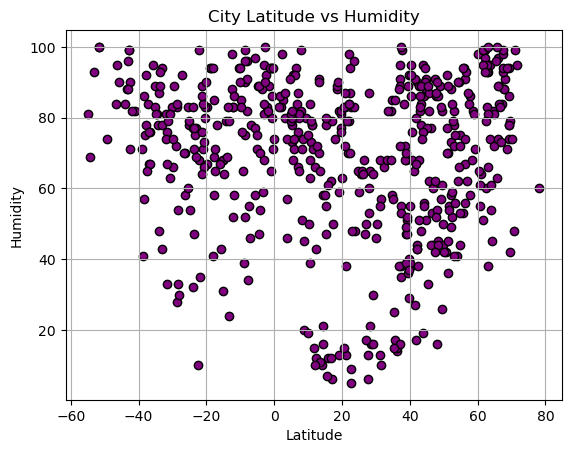

In [9]:
#Latitude vs Humidity
lat = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(x=lat, y=humidity, c='purple', edgecolors='black')
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

#Save png file
plt.savefig('output_data/Fig2.png')


plt.show()

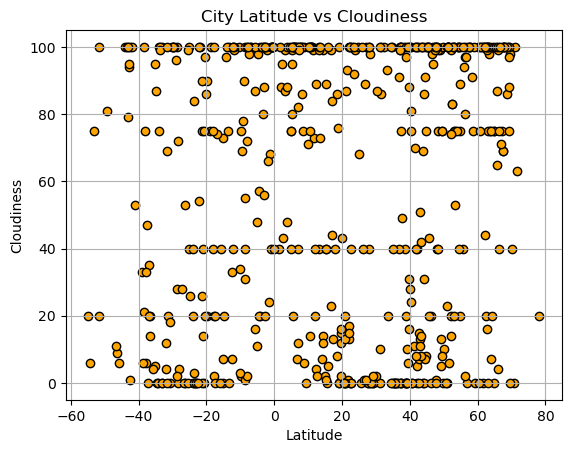

In [10]:
#Latidude vs Cloudiness
lat = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
plt.scatter(x=lat, y=cloudiness, c='orange', edgecolors='black')
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

#Save png file
plt.savefig('output_data/Fig3.png')


plt.show()

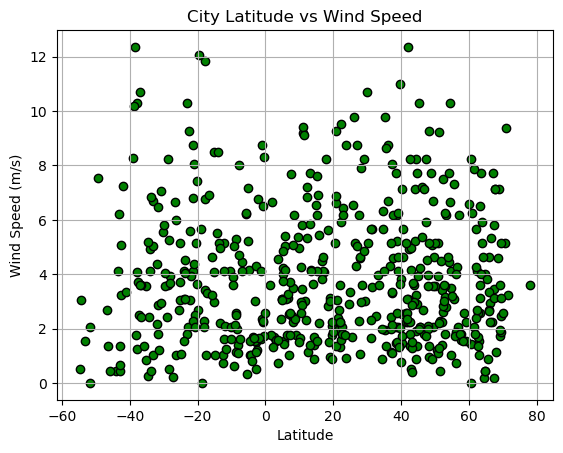

In [11]:
#Latidue vs Wind Speed
lat = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']
plt.scatter(x=lat, y=wind_speed, c='green', edgecolors='black')
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

#Save png file
plt.savefig('output_data/Fig3.png')


plt.show()

# Linear Regression for each relationship

In [55]:
#Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept

    plt.scatter(x, y)
    plt.plot(x, line, '--', color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.1, 0.1, equation, transform=plt.gca().transAxes, color='red')

    plt.show()
    print('r-value: ',r_value)


In [21]:
#Create a northern hemisphere dataframe
northern = city_data_df.loc[city_data_df['Lat']>= 0]
northern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,17.97,68,0,5.66,US,1715194835
1,berezovyy,51.6667,135.7000,10.73,55,100,2.29,RU,1715194836
2,tiksi,71.6872,128.8694,-9.37,95,63,3.24,RU,1715194836
4,hamilton,39.1834,-84.5333,29.79,51,0,2.06,US,1715194369
6,arauca,7.0847,-70.7591,32.98,66,40,1.03,CO,1715194836


In [22]:
#Create a southern hemisphere dataframe
southern = city_data_df.loc[city_data_df['Lat']<0]
southern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,14.32,67,35,10.70,SH,1715194836
5,richards bay,-28.7830,32.0377,21.71,83,28,3.59,ZA,1715194836
7,port-aux-francais,-49.3500,70.2167,4.89,74,81,7.52,TF,1715194836
10,ushuaia,-54.8000,-68.3000,3.79,81,20,0.51,AR,1715194576
12,waitangi,-43.9535,-176.5597,9.34,84,100,0.45,NZ,1715194837


# Temperature vs Latitude Linear Regression Plots

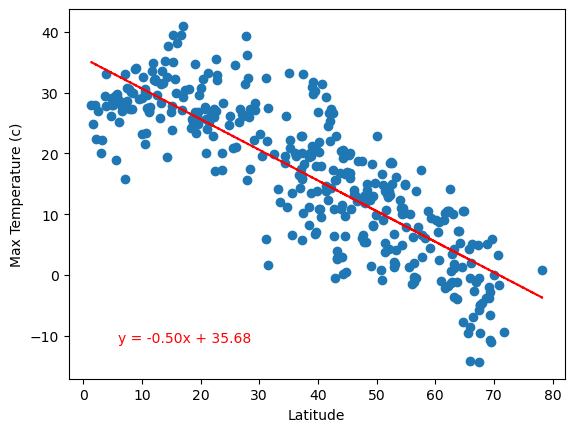

r-value:  -0.8364773177834569


In [56]:
# Temperature vs Latitude - NORTHERN
lat = northern['Lat']
max_temp = northern['Max Temp']
plot_linear_regression(lat, max_temp, 'Latitude','Max Temperature (c)')

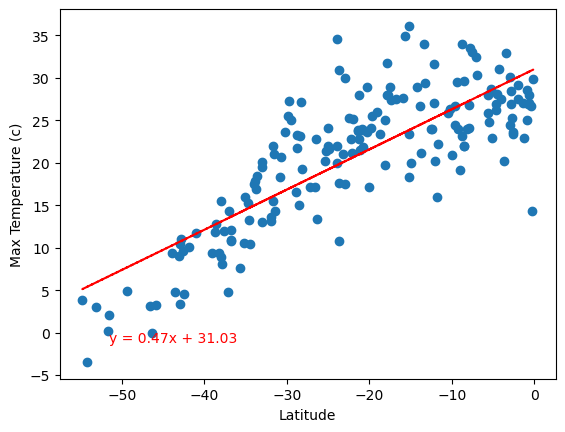

r-value:  0.8056392766227595


In [57]:
# Temperature vs Latitude - SOUTHERN
lat = southern['Lat']
max_temp = southern['Max Temp']
plot_linear_regression(lat, max_temp, 'Latitude','Max Temperature (c)')

## Discussion
The northern hemisphere analysis of temperature vs latitude shows a strong negative correlation. This shows that as latitude in the north increases (moves farther from the equator) the maximum temperature decreases. 

The southern hemisphere analysis of temperature vs latitude shows a strong positive correlation, where an increase in latitude (moving closer to the equator) shows an increase in maximum temperature. 

# Humidity vs Latitude

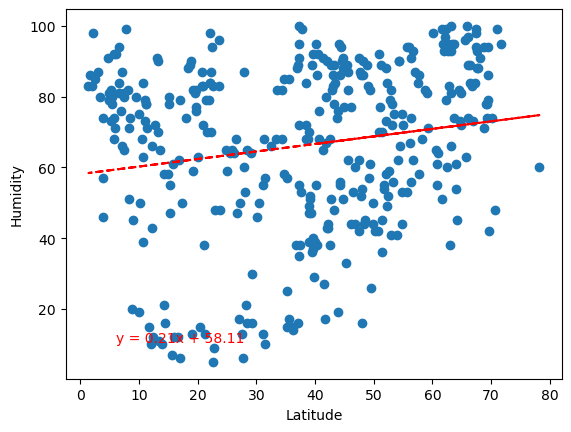

r-value:  0.17640635237147873


In [58]:
#humidity vs latitude - NORTHERN 
lat = northern['Lat']
humidity = northern['Humidity']
plot_linear_regression(lat, humidity, 'Latitude', 'Humidity')

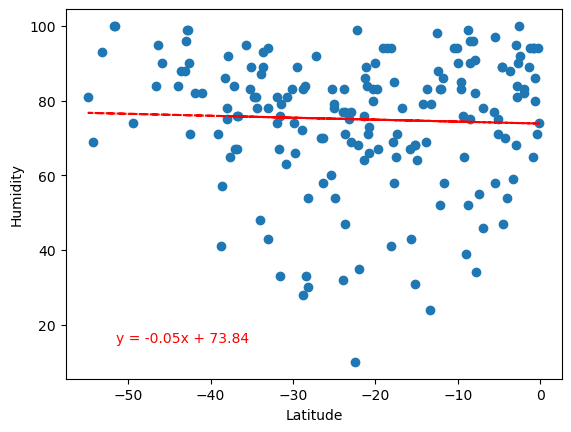

r-value:  -0.041166321794134764


In [59]:
#Humidity vs latitude - SOUTHERN
lat = southern['Lat']
humidity = southern['Humidity']
plot_linear_regression(lat, humidity, 'Latitude', 'Humidity')

## Discussion
Analysis of latitude vs humidity in the northern hemisphere showed a very weak positive correlation between between the variables. No significant relationship between latitude and humidity for the northern hemisphere data gathered. 

Analysis of latitude vs humidity in the southern hemisphere showed a very weak negative correlation. No significant relationship can be drawn between these variables on the given data. 

# Cloudiness vs Latitude Linear Regression Plots

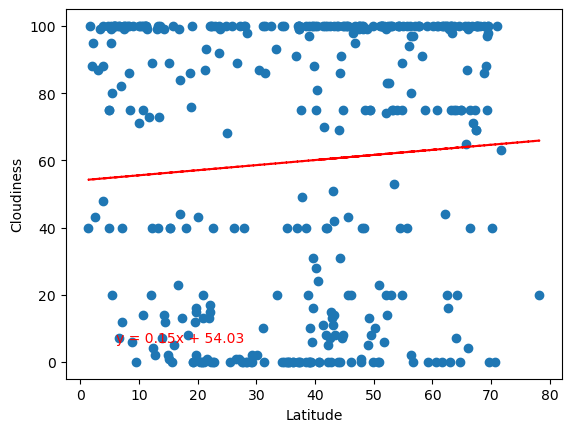

r-value:  0.07271074093405402


In [60]:
#Cloudiness vs Latitude - NORTHERN
lat = northern['Lat']
humidity = northern['Cloudiness']
plot_linear_regression(lat, humidity, 'Latitude', 'Cloudiness')

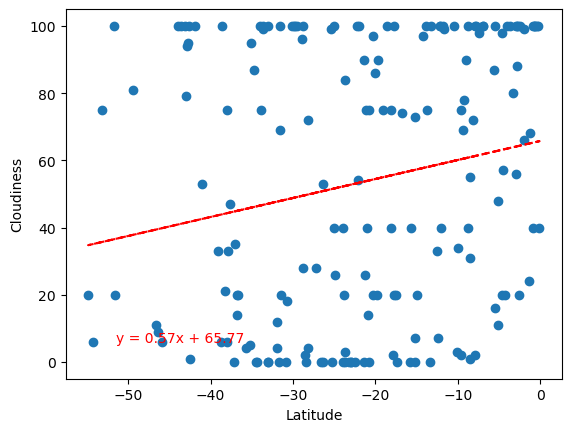

r-value:  0.19714049342819362


In [61]:
#Cloudiness vs Latitude - SOUTHERN
lat = southern['Lat']
humidity = southern['Cloudiness']
plot_linear_regression(lat, humidity, 'Latitude', 'Cloudiness')

## Discussion 
Analysis of cloudiness vs latitude in the northern hemisphere indicates a very weak correlation between the variables. No significant pattern of cloudiness can be assessed by latitude in this example. 

Analysis of cloudiness vs latitude in the southern hemisphere indicates a very weak correlatio between the variables. No significant pattern of cloudiness can be assessed by latitude in this example. 

# Wind Speed vs Latitude Linear Regression Plot

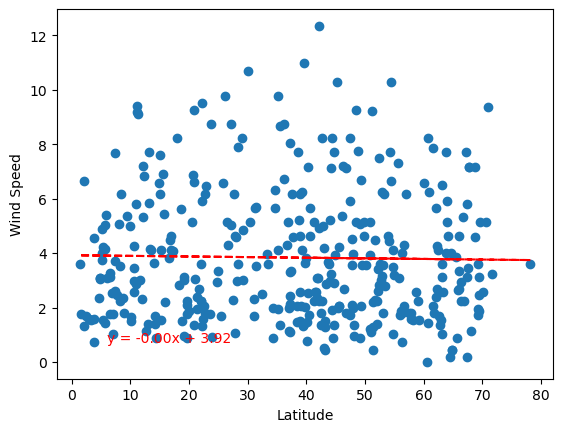

r-value:  -0.01879421800744656


In [62]:
#Wind Speed vs Latitude - NORTHERN
lat = northern['Lat']
humidity = northern['Wind Speed']
plot_linear_regression(lat, humidity, 'Latitude', 'Wind Speed')

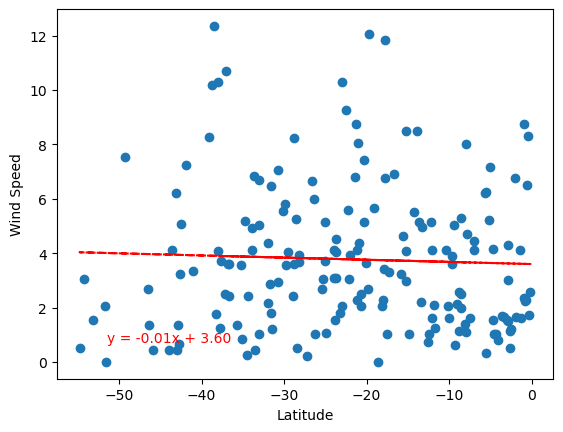

r-value:  -0.04144559390772903


In [63]:
#Wind Speed vs Latitude - SOUTHERN
lat = southern['Lat']
humidity = southern['Wind Speed']
plot_linear_regression(lat, humidity, 'Latitude', 'Wind Speed')

## Discussion 
The northern hemisphere analysis of wind speed vs latitude showed a very weak negative correlation. No significant findings. 

The southern hemisphere analysis of wind speed vs latitude showed a very weak negative correlation. No significant findings. 